In [519]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [520]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
data = data[:, 4:6]
target = raw_df.values[1::2, 2]
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT", "MEDV"]

In [521]:
df = pd.DataFrame(data, columns=feature_names[4:6])
print(df)

       NOX     RM
0    0.538  6.575
1    0.469  6.421
2    0.469  7.185
3    0.458  6.998
4    0.458  7.147
..     ...    ...
501  0.573  6.593
502  0.573  6.120
503  0.573  6.976
504  0.573  6.794
505  0.573  6.030

[506 rows x 2 columns]


In [522]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [523]:
reg = LinearRegression()
reg.fit(x_train, y_train)
score = reg.score(x_test, y_test)

print(f"Coef: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")
print(f"Score: {score*100:.4}%")

Coef: [-17.1244824    8.26784898]
Intercept: -19.741106770701798
Score: 53.83%


###Non-linear Transformation

In [524]:
from sklearn.preprocessing import PolynomialFeatures

degree = 3
pf = PolynomialFeatures(degree=degree)
pf.fit(x_train)

x_train_transformed = pf.transform(x_train)
x_test_transformed = pf.transform(x_test)

In [525]:
print(f"old num features: {pf.n_features_in_}")
print(f"old feature names: 'x0', 'x1'")
print(f"new num features: {pf.n_output_features_}")
print(f"new feature names: {pf.get_feature_names_out()}")

old num features: 2
old feature names: 'x0', 'x1'
new num features: 10
new feature names: ['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3']


In [526]:
poly_reg = LinearRegression()
poly_reg.fit(x_train_transformed, y_train)
score = poly_reg.score(x_test_transformed, y_test)

print(f"Coef: {poly_reg.coef_}")
print(f"Intercept: {poly_reg.intercept_}")
print(f"Score: {score*100:.4}%")

Coef: [   0.         -216.77832703 -187.82190845 -541.34032376  174.88345836
   20.36414758  476.91382093  -57.40453554   -8.89207271   -0.6464787 ]
Intercept: 460.2171404529591
Score: 73.03%


In [527]:
def plot_residuals(reg, x_train, x_test, y_train, y_test):
    train_pred = reg.predict(x_train)
    test_pred = reg.predict(x_test)

    min_val = min(np.min(train_pred), np.min(test_pred))
    max_val = max(np.max(train_pred), np.max(test_pred))

    plt.scatter(train_pred, train_pred-y_train, color="red")
    plt.scatter(test_pred, test_pred-y_test, color="blue")
    plt.hlines(0, min_val, max_val, colors=["black"])
    plt.legend(["Train", "Test"])
    plt.show()

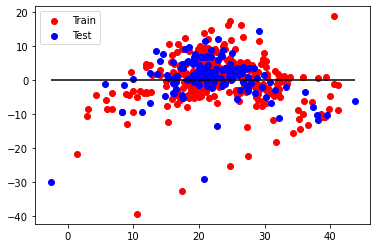

In [528]:
plot_residuals(reg, x_train, x_test, y_train, y_test)

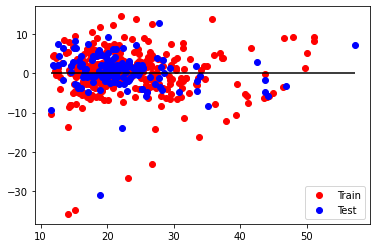

In [529]:
plot_residuals(poly_reg, x_train_transformed, x_test_transformed, y_train, y_test)